In [79]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [80]:
# import csv file
df = pd.read_csv('amazon.csv', encoding= 'unicode_escape')

In [81]:
df.shape

(1465, 24)

In [82]:
df.head()

,product_id,product_name,category,Unnamed: 3,Unnamed: 4,discount_percentage,rating,rating_count,about_product,user_id,...,Age Group,Marital_status,State,Zone,Occupation,Age,Cust_Name,Age.1,Amount,Order
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,26-35,0,Maharashtra,Western,Healthcare,28,Sanskriti,28,23952.0,1
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,26-35,1,Andhra Pradesh,Southern,Govt,35,Kartik,35,23934.0,3
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,90%,3.9,"7,928",ã Fast Charger& Data Syncã-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,26-35,1,Uttar Pradesh,Central,Automobile,35,Bindu,35,23924.0,3
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,0-17,0,Karnataka,Southern,Construction,16,Sudevi,16,23912.0,2
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,26-35,1,Gujarat,Western,Food Processing,28,Joni,28,23877.0,2


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   Unnamed: 3           0 non-null      float64
 4   Unnamed: 4           0 non-null      float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  Unnamed: 10          0 non-null      float64
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  Gender               1464 non-null   object 
 14  Age Group            1465 non-null   object 
 15  Marital_status       1465 non-null   i

In [84]:
#drop unrelated/blank columns
df.drop(['Age.1','Unnamed: 3','Unnamed: 4','Unnamed: 10'], axis=1, inplace=True)

In [85]:
#check for null values
pd.isnull(df).sum()

product_id              0
product_name            0
category                0
discount_percentage     0
rating                  0
rating_count            2
about_product           0
user_id                 0
review_id               0
review_title            0
Gender                  1
Age Group               0
Marital_status          0
State                   0
Zone                    0
Occupation              0
Age                     0
Cust_Name               0
Amount                 12
Order                   0
dtype: int64

In [86]:
# Assuming df is your DataFrame

# Drop rows where any of the specified columns contain null values
df = df.dropna(subset=['Amount', 'rating_count', 'Gender'])


In [87]:
#check for null values
pd.isnull(df).sum()

product_id             0
product_name           0
category               0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
review_id              0
review_title           0
Gender                 0
Age Group              0
Marital_status         0
State                  0
Zone                   0
Occupation             0
Age                    0
Cust_Name              0
Amount                 0
Order                  0
dtype: int64

In [88]:
df.columns

Index(['product_id', 'product_name', 'category', 'discount_percentage',
       'rating', 'rating_count', 'about_product', 'user_id', 'review_id',
       'review_title', 'Gender', 'Age Group', 'Marital_status', 'State',
       'Zone', 'Occupation', 'Age', 'Cust_Name', 'Amount', 'Order'],
      dtype='object')

In [89]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,Marital_status,Age,Amount,Order
count,1450.000000,1450.000000,1450.000000,1450.000000
mean,0.417241,36.555862,18908.718228,2.442759
std,0.493274,12.677068,1778.822473,1.119422
min,0.000000,12.000000,16290.000000,1.000000
25%,0.000000,28.000000,16817.250000,1.000000
50%,0.000000,34.000000,19292.500000,2.000000
75%,1.000000,44.000000,20209.750000,3.000000
max,1.000000,92.000000,23952.000000,4.000000


In [90]:
# use describe() for specific columns
df[['Age', 'Order', 'Amount','rating']].describe()

,Age,Order,Amount
count,1450.000000,1450.000000,1450.000000
mean,36.555862,2.442759,18908.718228
std,12.677068,1.119422,1778.822473
min,12.000000,1.000000,16290.000000
25%,28.000000,1.000000,16817.250000
50%,34.000000,2.000000,19292.500000
75%,44.000000,3.000000,20209.750000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

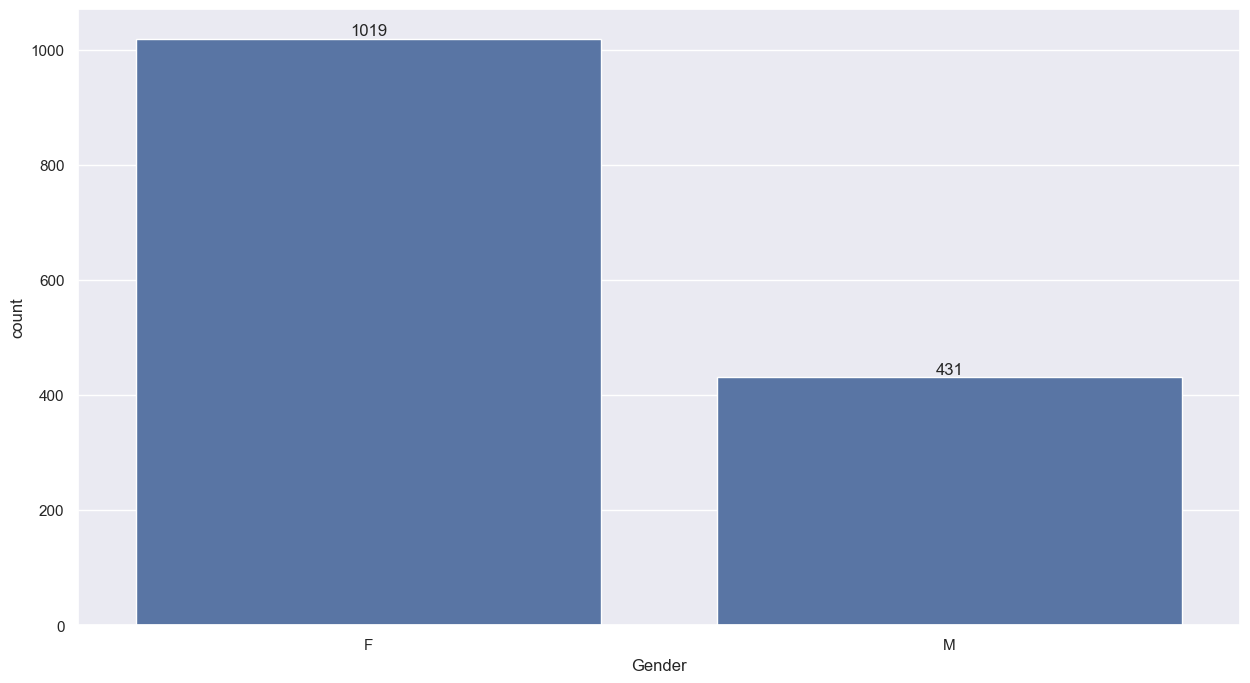

In [93]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

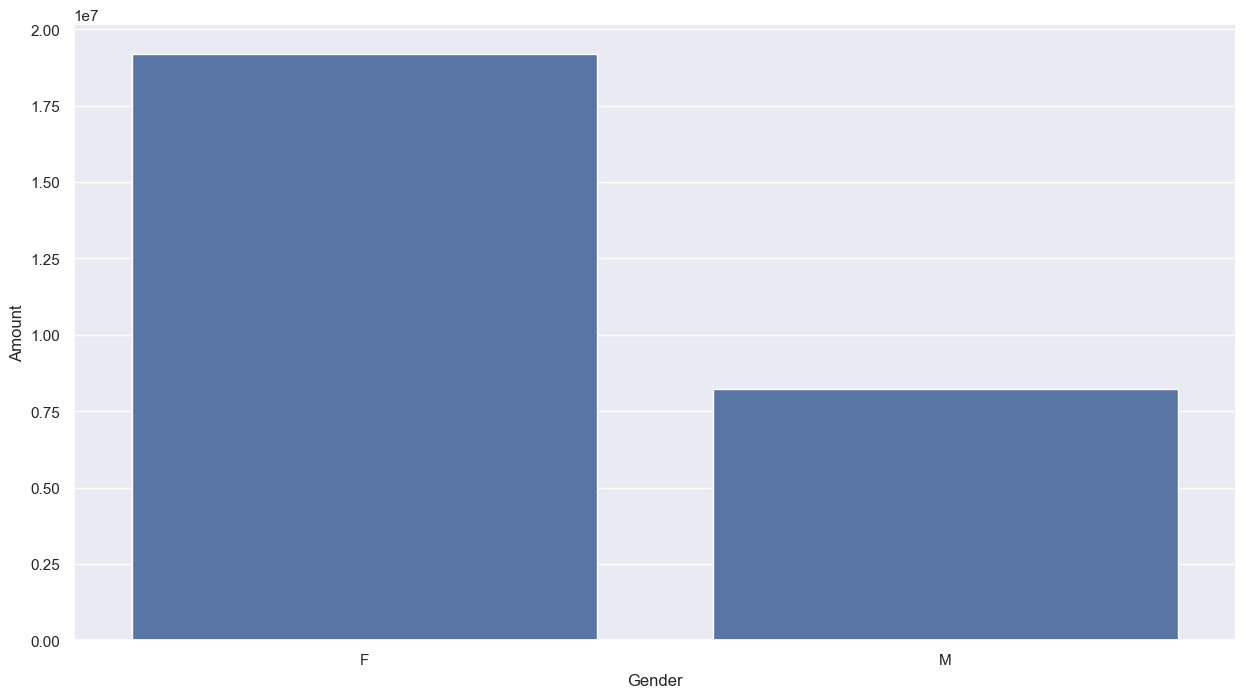

In [94]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

### Age

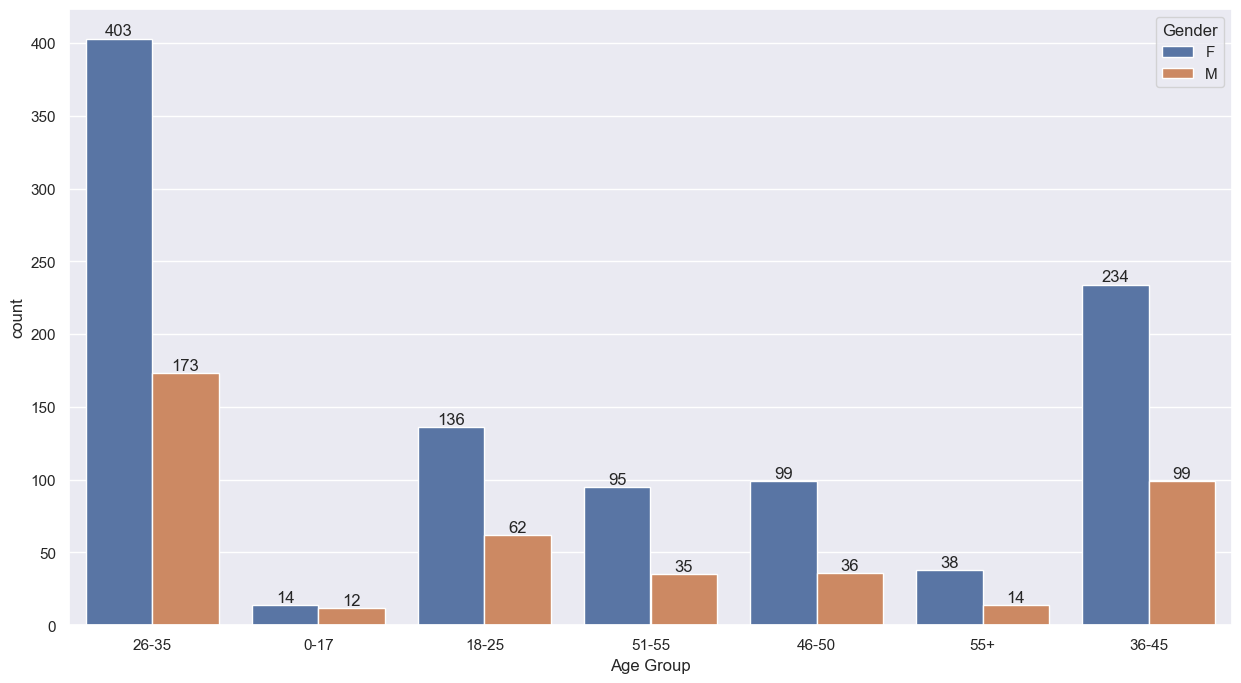

In [97]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

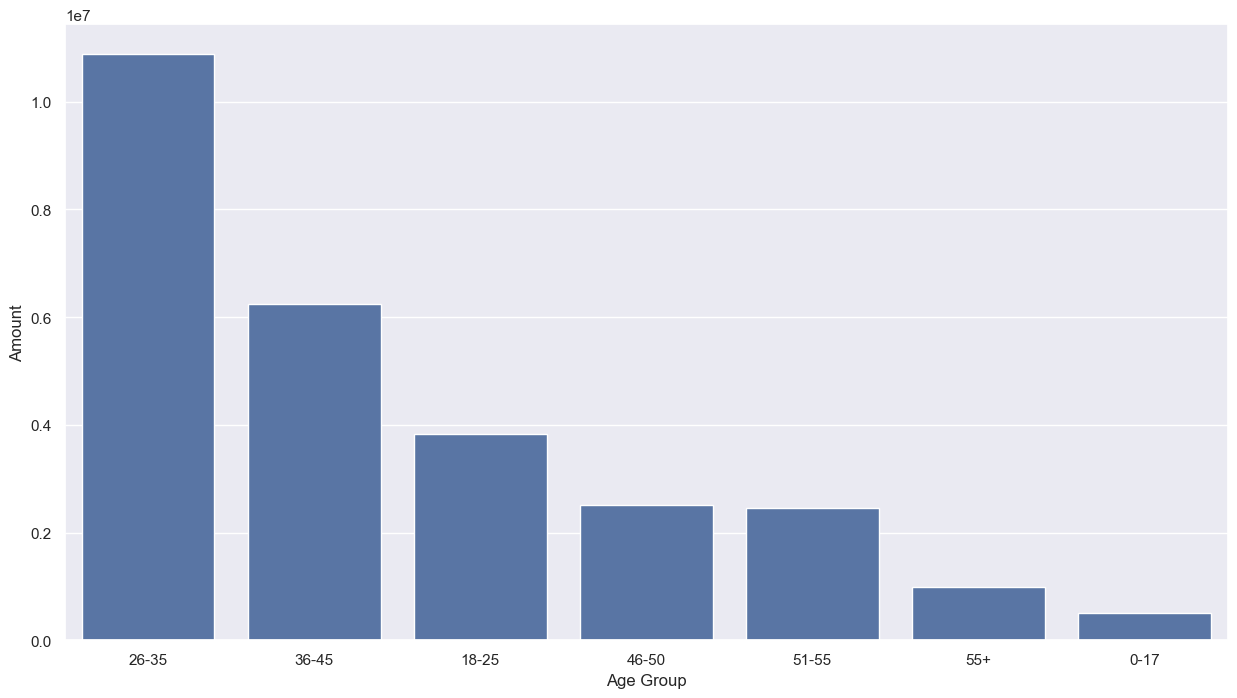

In [98]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

### State

<Axes: xlabel='State', ylabel='Order'>

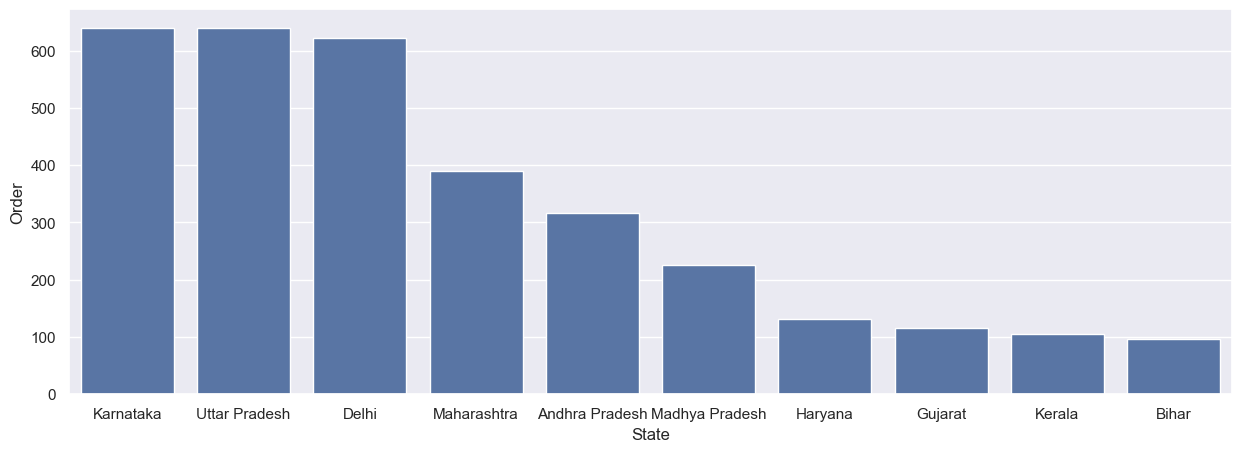

In [101]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Order'].sum().sort_values(by='Order', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Order')

<Axes: xlabel='State', ylabel='Amount'>

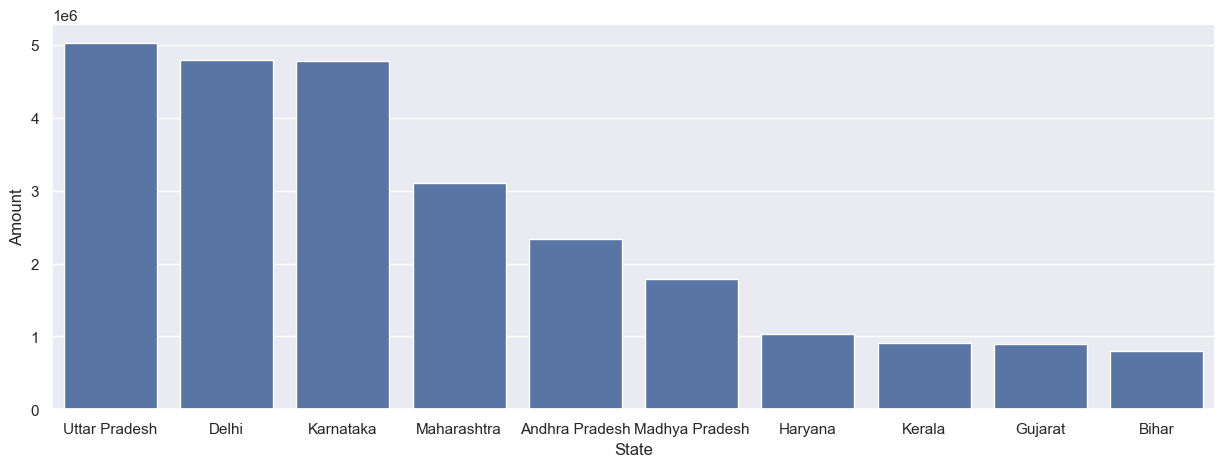

In [102]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

### Marital Status

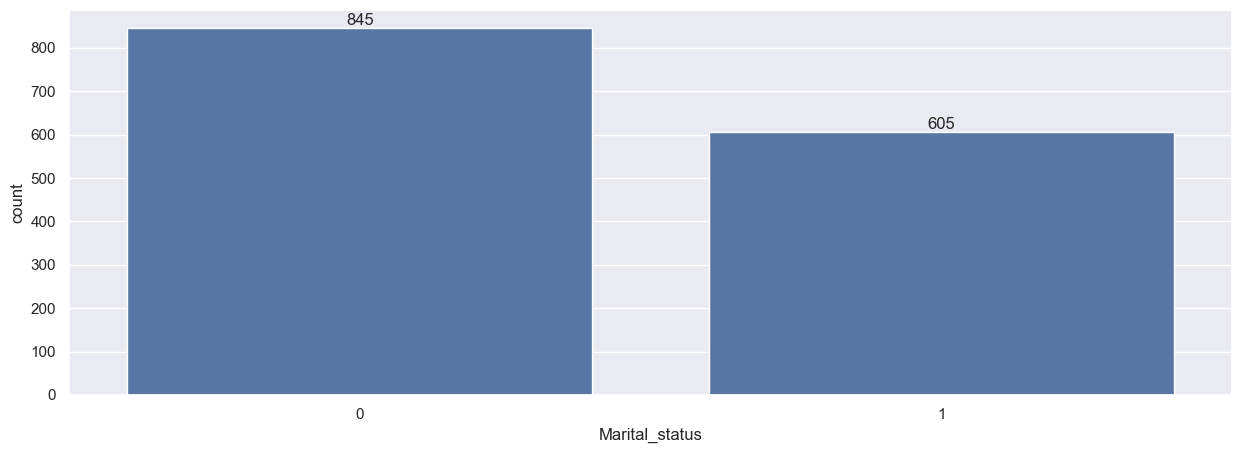

In [105]:
ax = sns.countplot(data = df, x = 'Marital_status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_status', ylabel='Amount'>

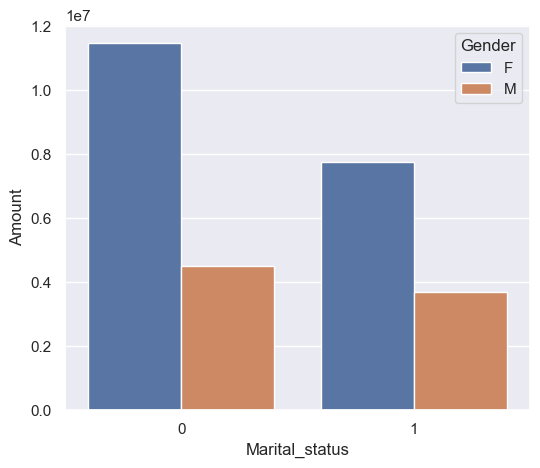

In [106]:
sales_state = df.groupby(['Marital_status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_status',y= 'Amount', hue='Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

### Occupation

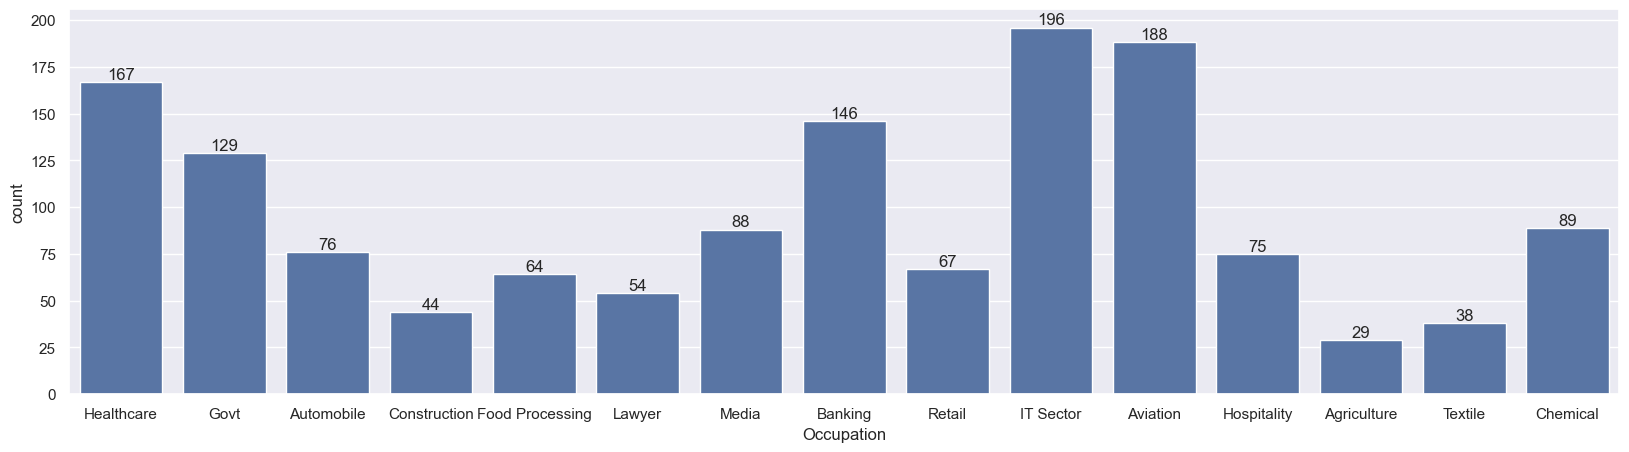

In [109]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

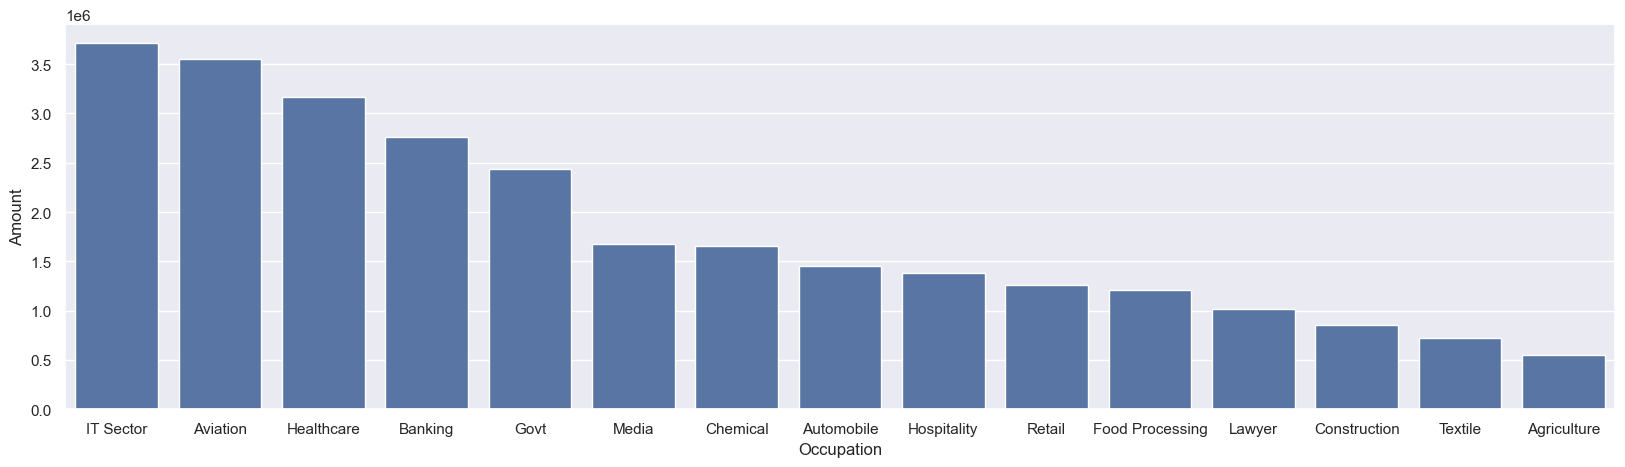

In [110]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product I'd

<Axes: xlabel='product_id', ylabel='Order'>

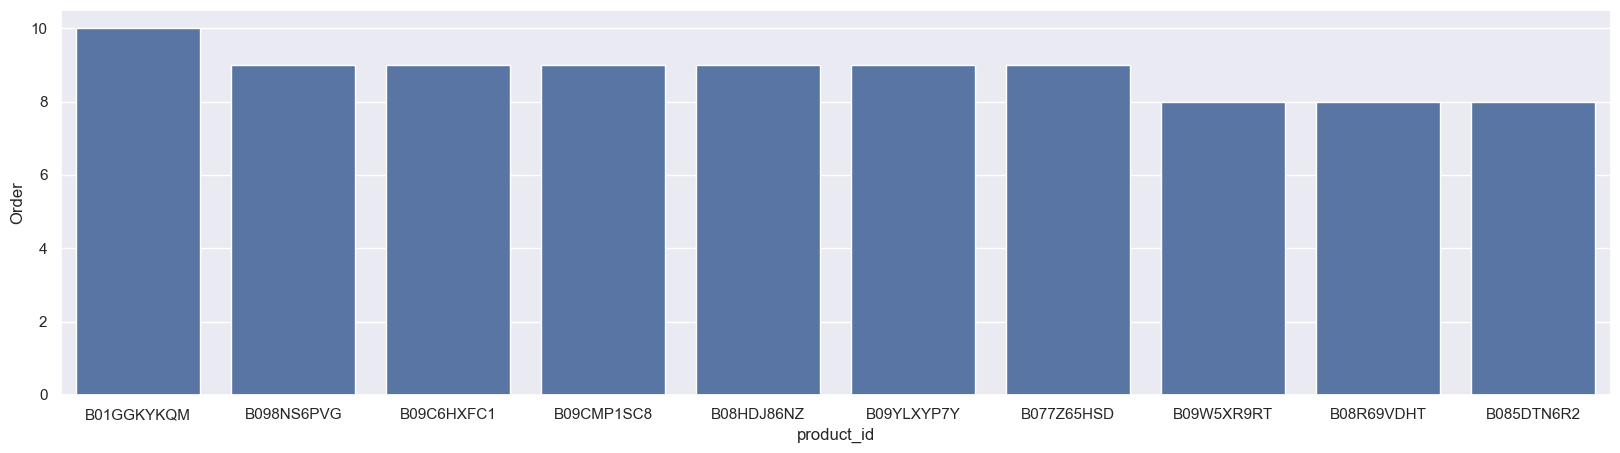

In [113]:
sales_state = df.groupby(['product_id'], as_index=False)['Order'].sum().sort_values(by='Order', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'product_id',y= 'Order')

<Axes: xlabel='product_id'>

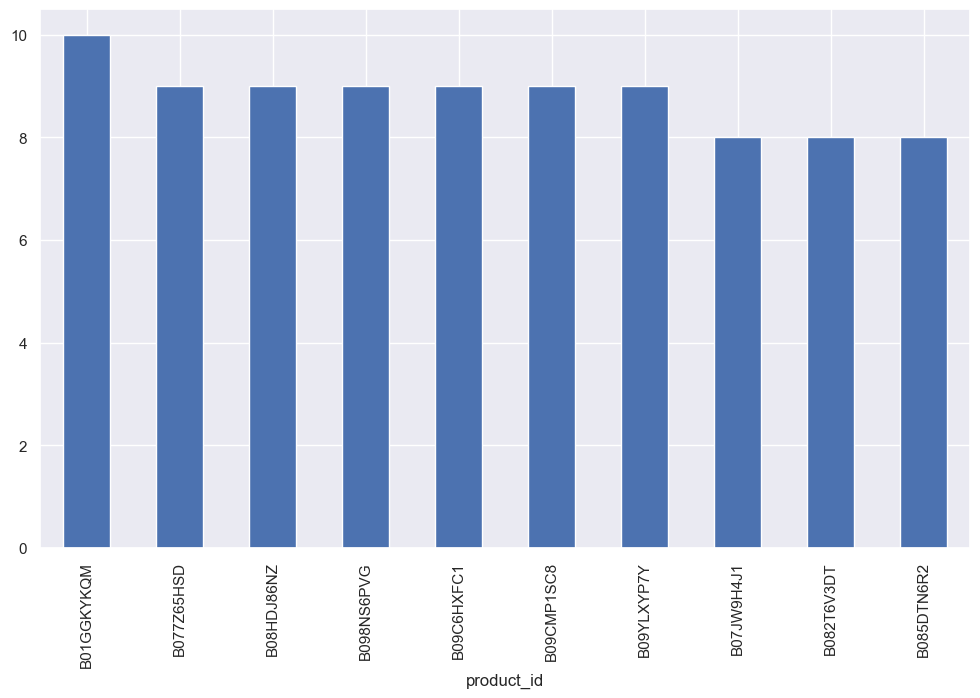

In [114]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('product_id')['Order'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

### Rating

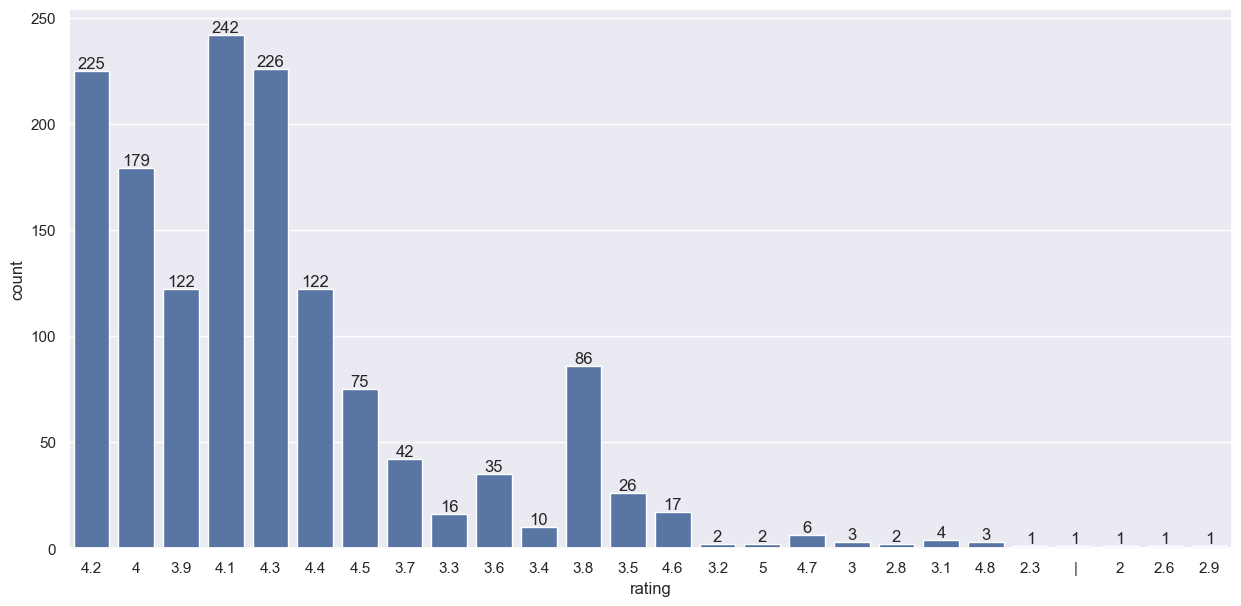

In [116]:
# plotting a bar chart for Rating and it's count
fig1, ax1 = plt.subplots(figsize=(15,7))
ax = sns.countplot(x = 'rating',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

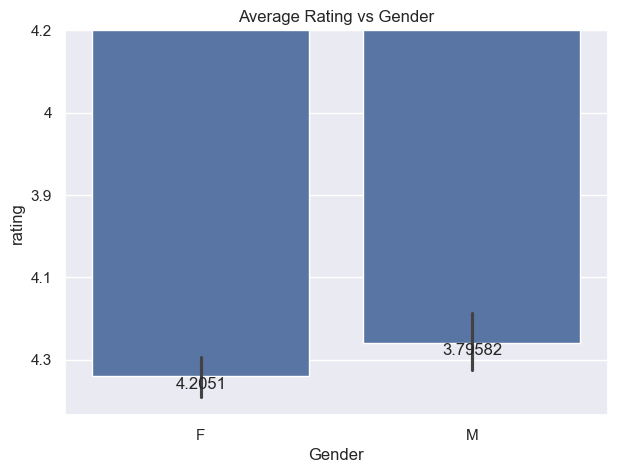

In [117]:
# Create a bar plot showing average rating for each gender
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.barplot(data=df, x='Gender', y='rating', estimator=lambda x: sum(x) / len(x))

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Average Rating vs Gender')
plt.show()


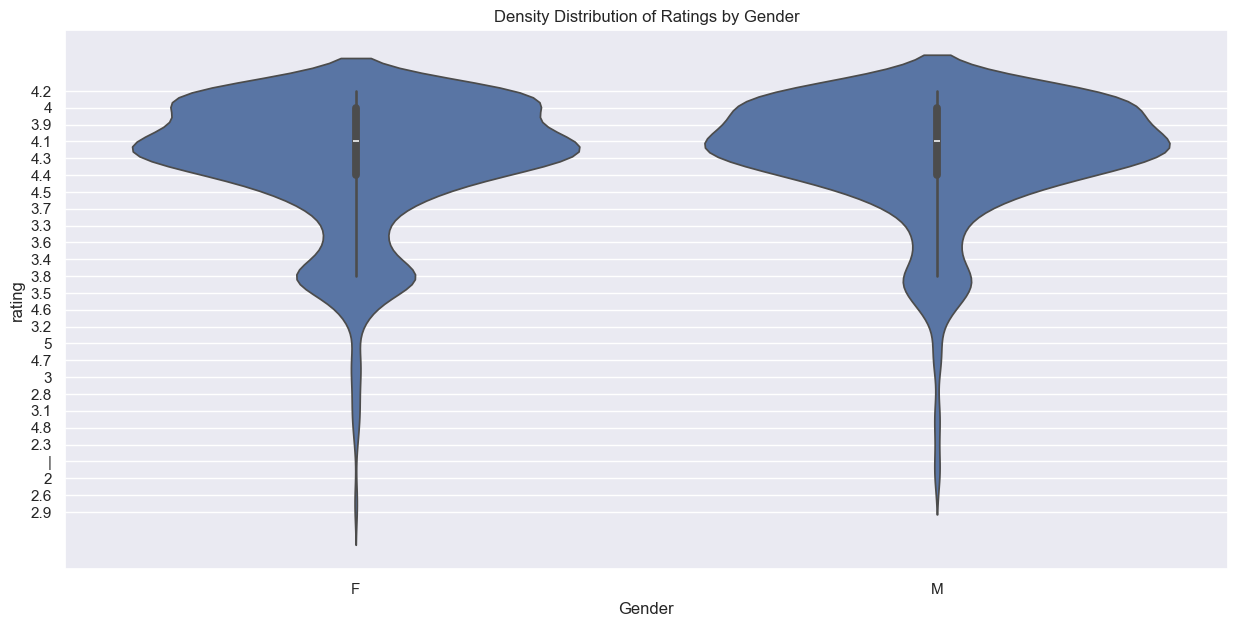

In [118]:
# Create a violin plot showing the density distribution of ratings for each gender
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.violinplot(data=df, x='Gender', y='rating')

plt.title('Density Distribution of Ratings by Gender')
plt.show()


# Product Performance Analysis

### Top products by rating and sales

In [120]:
# Convert `rating_count` and `Amount` to numeric (if necessary)
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Analyze Top Products by Rating
top_rated_products = df[['product_name', 'rating', 'rating_count']].sort_values(by='rating', ascending=False)

# Analyze Top Products by Sales (Amount)
top_selling_products = df[['product_name', 'Amount']].groupby('product_name').sum().sort_values(by='Amount', ascending=False)

# Display Results
print("Top 10 Products by Rating:")
print(top_rated_products.head(10))

print("\nTop 10 Products by Sales:")
print(top_selling_products.head(10))


Top 10 Products by Rating:
                                           product_name rating  rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...      |           992
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...      5            23
174   Syncwire LTG to USB Cable for Fast Charging Co...      5             5
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...    4.8          3964
1145  Swiffer Instant Electric Water Heater Faucet T...    4.8         53803
1201  Oratech Coffee Frother electric, milk frother ...    4.8            28
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...    4.7          5935
1388  Campfire Spring Chef Prolix Instant Portable W...    4.7          2591
1226  Zuvexa USB Rechargeable Electric Foam Maker - ...    4.7            54
1223  FIGMENT Handheld Milk Frother Rechargeable, 3-...    4.7          1729

Top 10 Products by Sales:
                                                      Amount
product_name                          

### Discount vs. Rating

In [156]:


# Step 1: Remove '%' from 'discount_percentage' and handle missing values
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=False).str.strip()

# Step 2: Convert 'discount_percentage' to numeric, coercing errors into NaN
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Step 3: Convert 'rating' to numeric, coercing errors into NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Step 4: Optionally drop rows with missing values in 'discount_percentage' or 'rating'
df_cleaned = df.dropna(subset=['discount_percentage', 'rating'])

# Print the cleaned dataset to ensure everything is correct
print(df_cleaned.head())

# Optional: Save the cleaned data to a new CSV file
# df_cleaned.to_csv('cleaned_data.csv', index=False)


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discount_percentage  \
0  Computers&Accessories|Accessories&Peripherals|...                   64   
1  Computers&Accessories|Accessories&Peripherals|...                   43   
2  Computers&Accessories|Accessories&Peripherals|...                   90   
3  Computers&Accessories|Accessories&Peripherals|...                   53   
4  Computers&Accessories|Accessories&Peripherals|...                   61   

   rating  rating_count                                      about_product  \
0     4.2         24269  High Compatibility : Comp

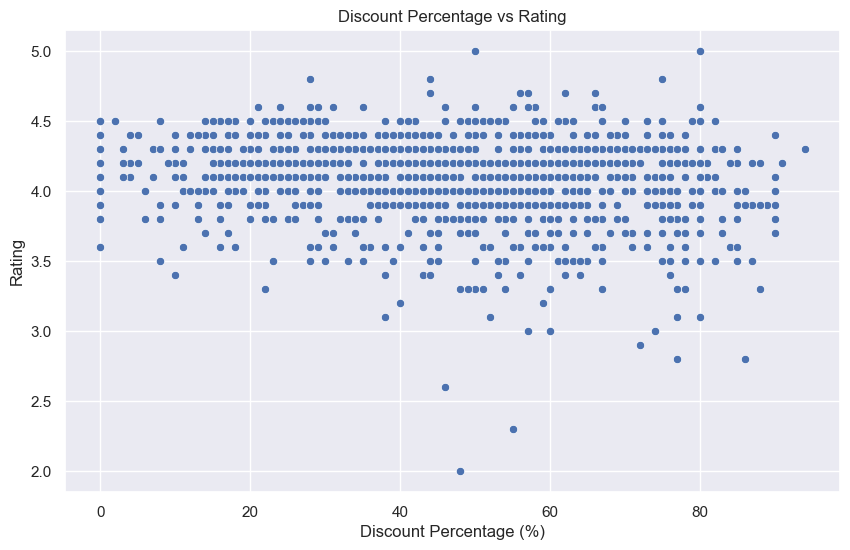

Correlation between Discount Percentage and Rating: -0.15


In [160]:
# Convert 'rating' to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Scatter plot for Discount vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=df)
plt.title('Discount Percentage vs Rating')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# Correlation between discount_percentage and rating
correlation = df['discount_percentage'].corr(df['rating'])
print(f"Correlation between Discount Percentage and Rating: {correlation:.2f}")


### Category analysis

In [169]:
# Convert rating_count and rating to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Split the category column into main category and subcategory using "|" as separator
df[['main_category', 'subcategory']] = df['category'].str.split('|', n=1, expand=True)

# Group by main_category and subcategory to analyze ratings and sales
category_performance = df.groupby(['main_category', 'subcategory']).agg({
    'rating': 'mean',           # Average rating per category
    'rating_count': 'sum'       # Total rating count as a proxy for sales
}).reset_index()

# Sort the categories by rating and sales for better performance visualization
category_performance_sorted = category_performance.sort_values(by=['rating_count', 'rating'], ascending=False)

# Display the top performing categories and subcategories
print("Top Performing Categories and Subcategories:")
print(category_performance_sorted.head(10))

# Optional: Save the results to a CSV file for further analysis
# category_performance_sorted.to_csv('category_performance.csv', index=False)


Top Performing Categories and Subcategories:
             main_category                                        subcategory  \
76             Electronics   Headphones,Earbuds&Accessories|Headphones|In-Ear   
10   Computers&Accessories  Accessories&Peripherals|Cables&Accessories|Cab...   
117            Electronics  Mobiles&Accessories|Smartphones&BasicMobiles|S...   
89             Electronics  HomeTheater,TV&Video|Accessories|Cables|HDMICa...   
119            Electronics                    WearableTechnology|SmartWatches   
58             Electronics                    Accessories|MemoryCards|MicroSD   
42   Computers&Accessories              ExternalDevices&DataStorage|PenDrives   
97             Electronics  HomeTheater,TV&Video|Televisions|SmartTelevisions   
49   Computers&Accessories  NetworkingDevices|NetworkAdapters|WirelessUSBA...   
103            Electronics  Mobiles&Accessories|MobileAccessories|Chargers...   

       rating  rating_count  
76   3.898077       4204939  
10 

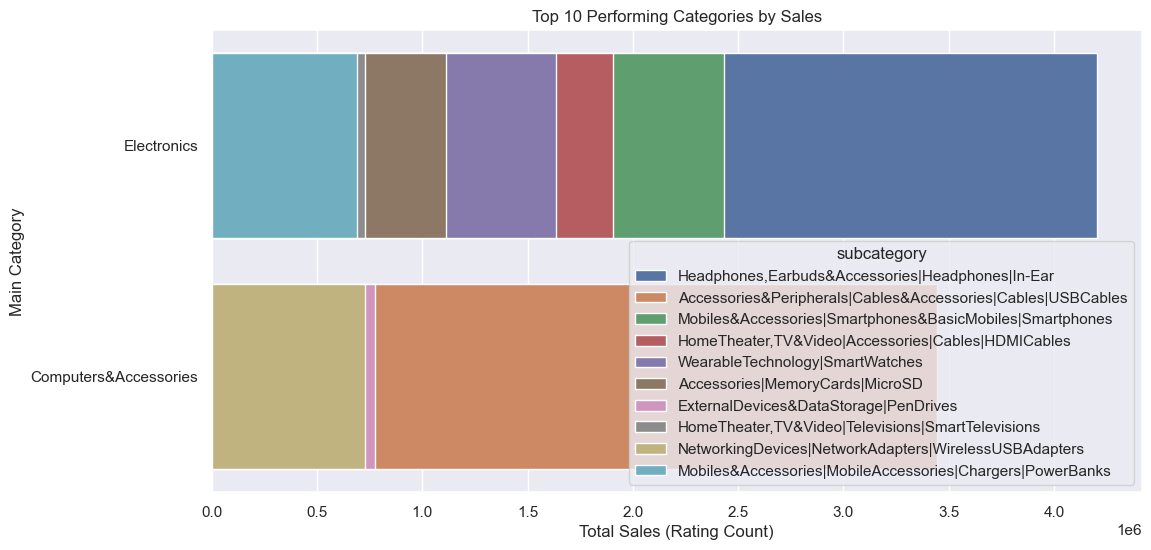

In [173]:
# Plot the top categories by sales (rating_count)
plt.figure(figsize=(12, 6))
top_categories_sales = category_performance_sorted.head(10)
sns.barplot(x='rating_count', y='main_category', data=top_categories_sales, hue='subcategory', dodge=False)
plt.title('Top 10 Performing Categories by Sales')
plt.xlabel('Total Sales (Rating Count)')
plt.ylabel('Main Category')
plt.show()


### Customer Segmentation

In [177]:
# Convert 'Amount' and 'Order' columns to numeric (if they aren't already)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Order'] = pd.to_numeric(df['Order'], errors='coerce')

# Segment customers based on demographic data and analyze spending behavior
demographic_segments = df.groupby(['Age Group', 'Occupation', 'Marital_status', 'State']).agg({
    'Amount': ['mean', 'sum'],       # Average and total amount spent
    'Order': ['count', 'sum']        # Frequency of orders (total orders and count of transactions)
}).reset_index()

# Rename columns for easier readability
demographic_segments.columns = ['Age Group', 'Occupation', 'Marital_status', 'State', 
                                'Avg_Amount_Spent', 'Total_Amount_Spent', 'Transaction_Count', 'Total_Orders']

# Calculate the frequency of orders (average number of orders per customer in each segment)
demographic_segments['Avg_Orders_Per_Customer'] = demographic_segments['Total_Orders'] / demographic_segments['Transaction_Count']

# Sort the data for better visibility (optional)
demographic_segments_sorted = demographic_segments.sort_values(by=['Total_Amount_Spent', 'Avg_Amount_Spent'], ascending=False)

# Display the segmented spending behavior analysis
print("Customer Segmentation and Spending Behavior Analysis:")
print(demographic_segments_sorted.head(10))

# Optional: Save the results to a CSV file for further analysis
# demographic_segments_sorted.to_csv('segmentation_spending_behavior.csv', index=False)


Customer Segmentation and Spending Behavior Analysis:
    Age Group Occupation  Marital_status          State  Avg_Amount_Spent  \
330     26-35  IT Sector               1          Delhi      18372.769231   
220     26-35    Banking               1  Uttar Pradesh      19187.500000   
323     26-35  IT Sector               0      Karnataka      18028.100000   
370     26-35     Retail               0      Karnataka      19275.222222   
200     26-35   Aviation               1  Uttar Pradesh      19062.333333   
216     26-35    Banking               1      Karnataka      18889.333333   
407     36-45   Aviation               0      Karnataka      18842.666667   
196     26-35   Aviation               1      Karnataka      18737.555556   
182     26-35   Aviation               0          Delhi      18606.444444   
189     26-35   Aviation               0    Maharashtra      17964.000000   

     Total_Amount_Spent  Transaction_Count  Total_Orders  \
330            238846.0               

### Recommendation System

#### Collaborative Filtering

In [180]:
pip install surprise



     ---------------------------------------- 0.0/154.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/154.4 kB ? eta -:--:--
     ---- -------------------------------- 20.5/154.4 kB 217.9 kB/s eta 0:00:01
     ------------ ------------------------ 51.2/154.4 kB 375.8 kB/s eta 0:00:01
     ---------------------------- ------- 122.9/154.4 kB 722.1 kB/s eta 0:00:01
     ------------------------------------ 154.4/154.4 kB 838.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-win_amd64.whl size=1291238 sha256=caa4be8ac01767ba27695e1a161124331cbf5e74ea39bc1cc74f5d02c24ce935
  Stored in directory: 

In [182]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

# Assuming 'df' is your DataFrame with columns 'user_id', 'product_id', 'rating'
# Load data
data = {
    'user_id': df['user_id'],
    'product_id': df['product_id'],
    'rating': df['rating']
}
df_collab = pd.DataFrame(data)

# Define the reader
reader = Reader(rating_scale=(0.0, 5.0))

# Load data into Surprise dataset
data = Dataset.load_from_df(df_collab[['user_id', 'product_id', 'rating']], reader)

# Split data into training and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# Build the model
model = SVD()
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)

# Get recommendations for a specific user
def get_recommendations(user_id, model, data, n_recommendations=10):
    # Get a list of all products
    all_products = set(df['product_id'].unique())
    
    # Get products the user has already rated
    user_rated_products = set(df[df['user_id'] == user_id]['product_id'])
    
    # Get the list of products not yet rated by the user
    products_to_predict = all_products - user_rated_products
    
    # Predict ratings for these products
    predictions = [model.predict(user_id, product_id) for product_id in products_to_predict]
    
    # Sort the predictions by estimated rating
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)
    
    # Get the top N recommendations
    top_recommendations = recommendations[:n_recommendations]
    
    return [(rec.iid, rec.est) for rec in top_recommendations]

# Example usage
user_id_example = 'AG3D6O4STAQKAY2UVGEUV46KN35Q'  # Replace with an actual user_id
print("Recommendations for user:", user_id_example)
print(get_recommendations(user_id_example, model, data))


RMSE: 0.9755
Recommendations for user: AG3D6O4STAQKAY2UVGEUV46KN35Q
[('B00E9G8KOY', 5.0), ('B07LFQLKFZ', 5.0), ('B0BHYJ8CVF', 5.0), ('B08FTFXNNB', 5.0), ('B09XB8GFBQ', 5.0), ('B07DJ5KYDZ', 5.0), ('B08TGG316Z', 5.0), ('B07YWS9SP9', 5.0), ('B0B3DV7S9B', 5.0), ('B09SB6SJB4', 5.0)]


#### Content-Based Filtering

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Assuming 'df' is your DataFrame with columns 'product_id', 'about_product'
# Create a DataFrame for the products
df_content = df[['product_id', 'about_product']].dropna()

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_content['about_product'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on a product
def get_content_based_recommendations(product_id, cosine_sim=cosine_sim, df=df_content, top_n=10):
    # Get the index of the product that matches the product_id
    idx = df[df['product_id'] == product_id].index[0]
    
    # Get pairwise similarity scores for all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the products based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top N most similar products
    sim_scores = sim_scores[1:top_n+1]
    
    # Get the product indices
    product_indices = [i[0] for i in sim_scores]
    
    # Return the top N most similar products
    return df.iloc[product_indices]['product_id'].tolist()

# Example usage
product_id_example = 'B07JW9H4J1'  # Replace with an actual product_id
print("Content-based recommendations for product:", product_id_example)
print(get_content_based_recommendations(product_id_example))


Content-based recommendations for product: B07JW9H4J1
['B07JW9H4J1', 'B07JW9H4J1', 'B07JH1CBGW', 'B07JW1Y6XV', 'B07JH1C41D', 'B07JPJJZ2H', 'B07LGT55SJ', 'B07JGDB5M1', 'B095244Q22', 'B07F1P8KNV']


In [189]:
#Collaborative Filtering:

#Data Preparation: Create a DataFrame with user-item interactions (ratings).
#Model Training: Train an SVD model using the surprise library.
#Recommendation Function: Predict ratings for items not yet rated by the user and recommend the highest-rated items.

#Content-Based Filtering:

#TF-IDF Vectorization: Convert product descriptions into numerical vectors.
#Cosine Similarity: Compute similarity scores between product descriptions.
#Recommendation Function: Find and recommend products similar to a given product based on the similarity scores.


#Choose the method based on your needs. Collaborative filtering is useful for capturing user preferences across similar users, while content-based filtering focuses on product attributes. For better results, you might consider hybrid approaches that combine both methods.

### Predictive Analytics

#### Customer churn prediction

In [192]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [194]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'df' is your DataFrame and it contains a 'churn' column
# For demonstration, I'll create a mock churn column
# df['churn'] = (df['Amount'] < 20000).astype(int)  # Example churn condition

# Features and target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Define categorical and numerical columns
categorical_features = ['Age Group', 'Occupation', 'State']
numerical_features = ['Amount', 'Age']

# Preprocessing for numerical data: standardization
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


KeyError: "['churn'] not found in axis"

#### Sales forecasting

In [198]:
pip install pandas numpy matplotlib statsmodels


Note: you may need to restart the kernel to use updated packages.


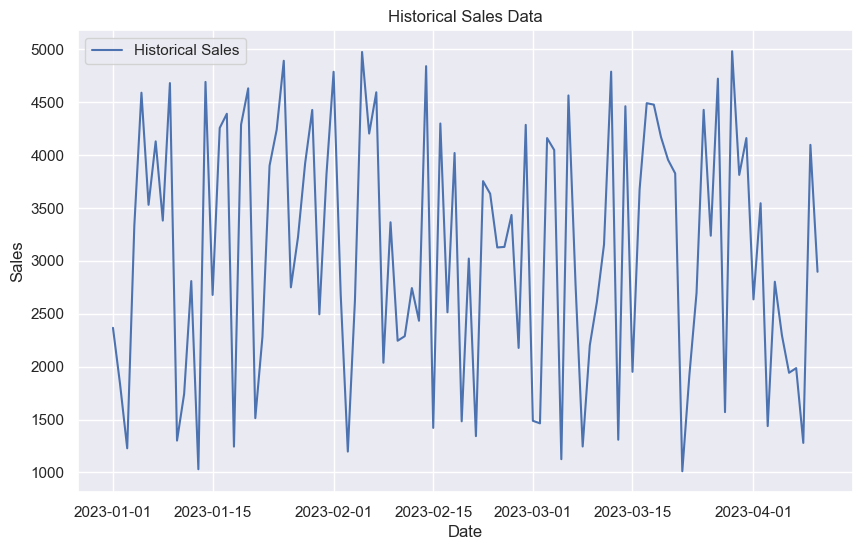

C:\Anaconda 3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda 3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda 3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 2817217.65


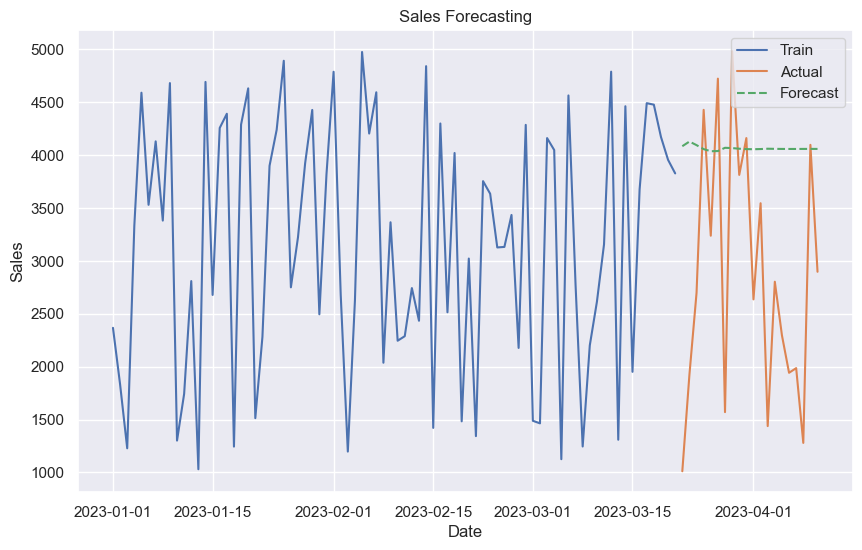

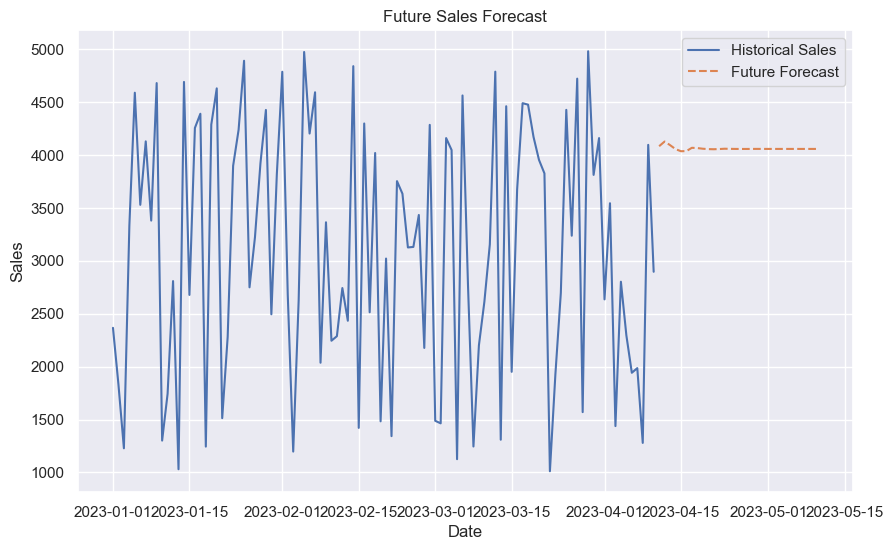

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame with 'date' and 'sales' columns
# Example data creation (replace with your actual DataFrame)
# df = pd.read_csv('sales_data.csv')  # Load your dataset
df = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'sales': np.random.randint(1000, 5000, size=100)
})

# Convert 'date' to datetime format and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot historical sales data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sales'], label='Historical Sales')
plt.title('Historical Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train['sales'], order=(5, 1, 0))  # Adjust order parameters as needed
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test['sales'], predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Plot predictions vs actual data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Actual')
plt.plot(test.index, predictions, label='Forecast', linestyle='--')
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Forecast future sales
future_steps = 30  # Number of future periods to forecast
future_forecast = model_fit.forecast(steps=future_steps)

# Create a DataFrame for future forecasts
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_steps)
future_df = pd.DataFrame({'date': future_dates, 'forecast': future_forecast})

# Plot future forecasts
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sales'], label='Historical Sales')
plt.plot(future_df['date'], future_df['forecast'], label='Future Forecast', linestyle='--')
plt.title('Future Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


### Sentiment Analysis

In [204]:
pip install pandas nltk textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   ----- ---------------------------------- 92.2/626.3 kB 1.8 MB/s eta 0:00:01
   --------------- ------------------------ 245.8/626.3 kB 2.2 MB/s eta 0:00:01
   ------------------------ --------------- 389.1/626.3 kB 2.4 MB/s eta 0:00:01
   --------------------------------- ------ 522.2/626.3 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\verma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


                                             reviews sentiment
0  I love this product! It works great and I am v...  Positive
1       The product is okay, but it could be better.  Positive
2  I am very disappointed with the purchase. It d...  Negative
3  Absolutely fantastic! Highly recommend this to...  Positive
4          Neutral experience, neither good nor bad.   Neutral


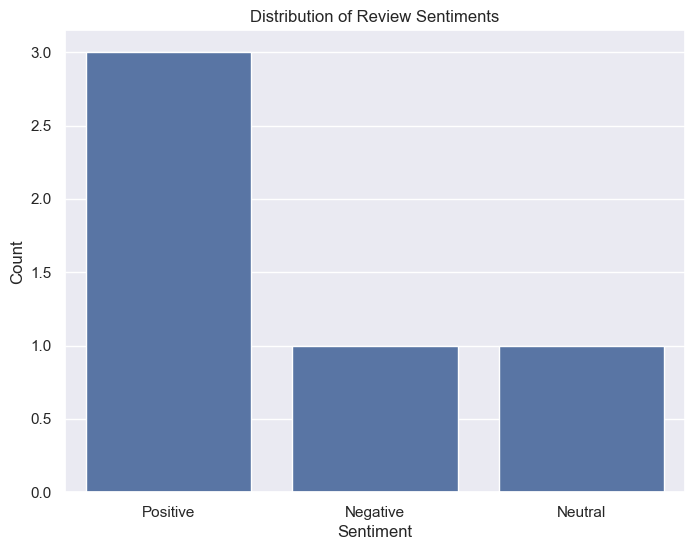

In [206]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

# Sample data creation (replace with your actual DataFrame)
# df = pd.read_csv('your_reviews_data.csv')  # Load your dataset
df = pd.DataFrame({
    'reviews': [
        'I love this product! It works great and I am very satisfied.',
        'The product is okay, but it could be better.',
        'I am very disappointed with the purchase. It did not meet my expectations.',
        'Absolutely fantastic! Highly recommend this to everyone.',
        'Neutral experience, neither good nor bad.'
    ]
})

# Define a function to perform sentiment analysis
def analyze_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Determine the sentiment polarity
    polarity = blob.sentiment.polarity
    # Classify sentiment based on polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to reviews
df['sentiment'] = df['reviews'].apply(analyze_sentiment)

# Display the results
print(df[['reviews', 'sentiment']])

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


### Visualization

In [211]:
pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.4 kB 544.7 kB/s eta 0:00:01
   ------------------------- -------------- 194.6/301.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [215]:
# Sample data creation (replace with your actual DataFrame)
df = pd.DataFrame({
    'category': ['Electronics', 'Books', 'Clothing', 'Electronics', 'Books', 'Clothing'],
    'sales': [5000, 2000, 1500, 6000, 2500, 1600],
    'reviews': [
        'Great product, I am very happy!',
        'The book was good, but the delivery was late.',
        'Nice clothes, fits well.',
        'Amazing electronics, high quality!',
        'Book was interesting, but not very engaging.',
        'The clothing is decent, but could be better.'
    ],
    'rating': [4.5, 3.8, 4.0, 5.0, 3.5, 4.2]
})

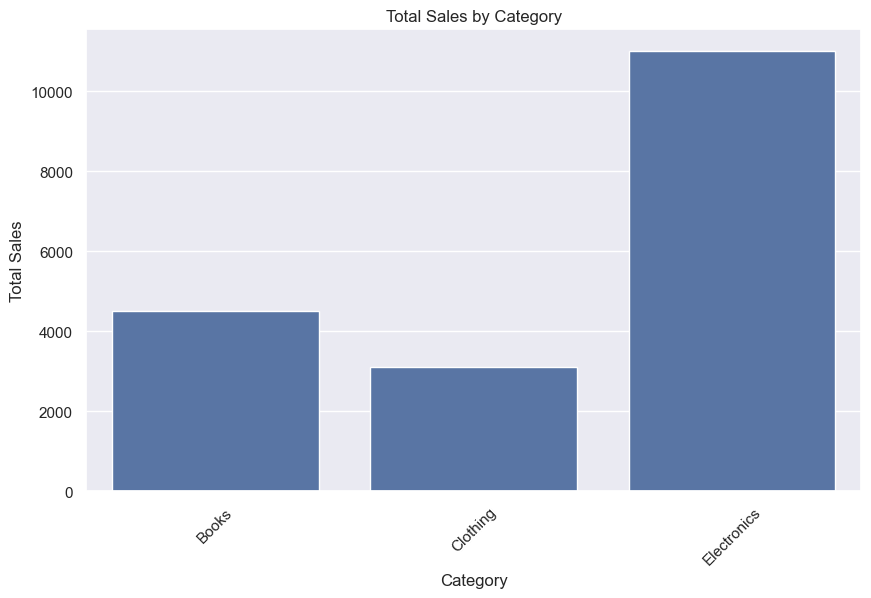

In [217]:
# 1. Bar Chart: Average Sales by Category
plt.figure(figsize=(10, 6))
sales_by_category = df.groupby('category')['sales'].sum().reset_index()
sns.barplot(x='category', y='sales', data=sales_by_category)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

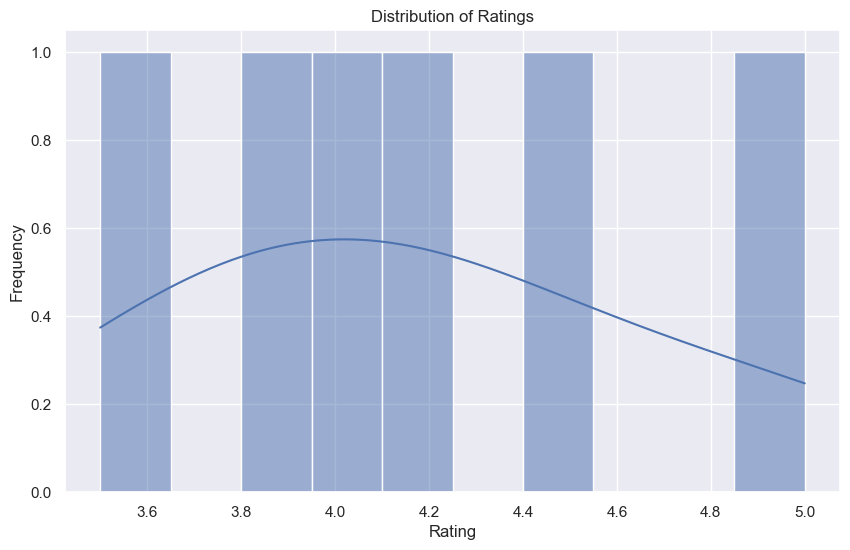

In [219]:
# 2. Histogram: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


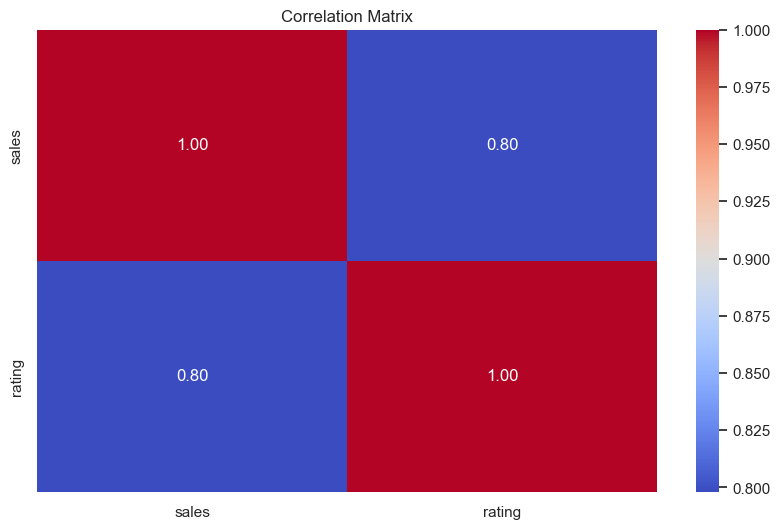

In [221]:
# 3. Heatmap: Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df[['sales', 'rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

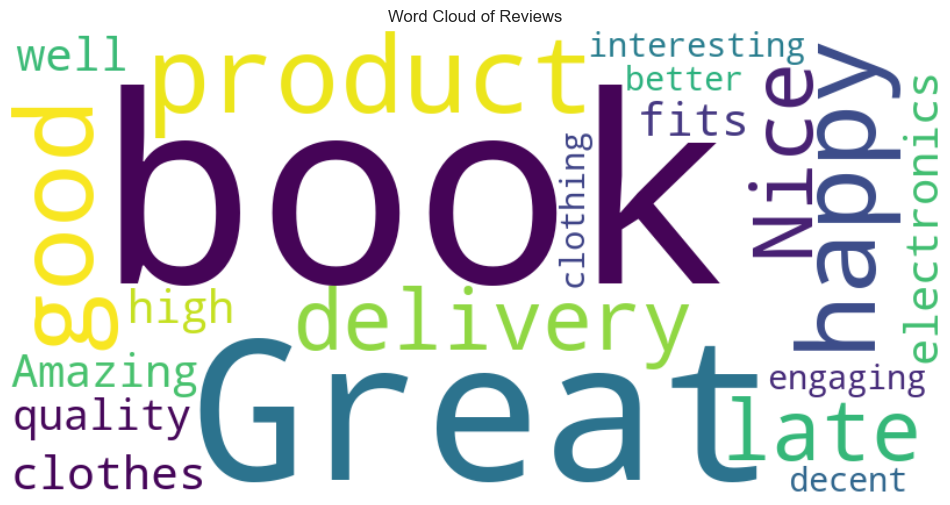

In [223]:
# 4. Word Cloud: Common Words in Reviews
text = ' '.join(review for review in df['reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

#### Potential Project Ideas

#### Customer Segmentation and Profiling

In [227]:
import pandas as pd

# Sample data creation (replace with your actual DataFrame)
df = pd.DataFrame({
    'Age Group': ['26-35', '26-35', '26-35', '0-17', '26-35'],
    'Occupation': ['Healthcare', 'Govt', 'Automobile', 'Construction', 'Food Processing'],
    'State': ['Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh', 'Karnataka', 'Gujarat'],
    'Amount': [23952.0, 23934.0, 23924.0, 23912.0, 23877.0]
})

# Display the first few rows of the dataset
print(df.head())


  Age Group       Occupation           State   Amount
0     26-35       Healthcare     Maharashtra  23952.0
1     26-35             Govt  Andhra Pradesh  23934.0
2     26-35       Automobile   Uttar Pradesh  23924.0
3      0-17     Construction       Karnataka  23912.0
4     26-35  Food Processing         Gujarat  23877.0


In [229]:
# Segment customers by Age Group, Occupation, and State
segments = df.groupby(['Age Group', 'Occupation', 'State']).agg({
    'Amount': ['mean', 'sum', 'count']  # Average, total, and count of Amount spent
}).reset_index()

# Rename columns for clarity
segments.columns = ['Age Group', 'Occupation', 'State', 'Average Amount Spent', 'Total Amount Spent', 'Number of Orders']

# Display the segmented data
print(segments)


  Age Group       Occupation           State  Average Amount Spent  \
0      0-17     Construction       Karnataka               23912.0   
1     26-35       Automobile   Uttar Pradesh               23924.0   
2     26-35  Food Processing         Gujarat               23877.0   
3     26-35             Govt  Andhra Pradesh               23934.0   
4     26-35       Healthcare     Maharashtra               23952.0   

   Total Amount Spent  Number of Orders  
0             23912.0                 1  
1             23924.0                 1  
2             23877.0                 1  
3             23934.0                 1  
4             23952.0                 1  


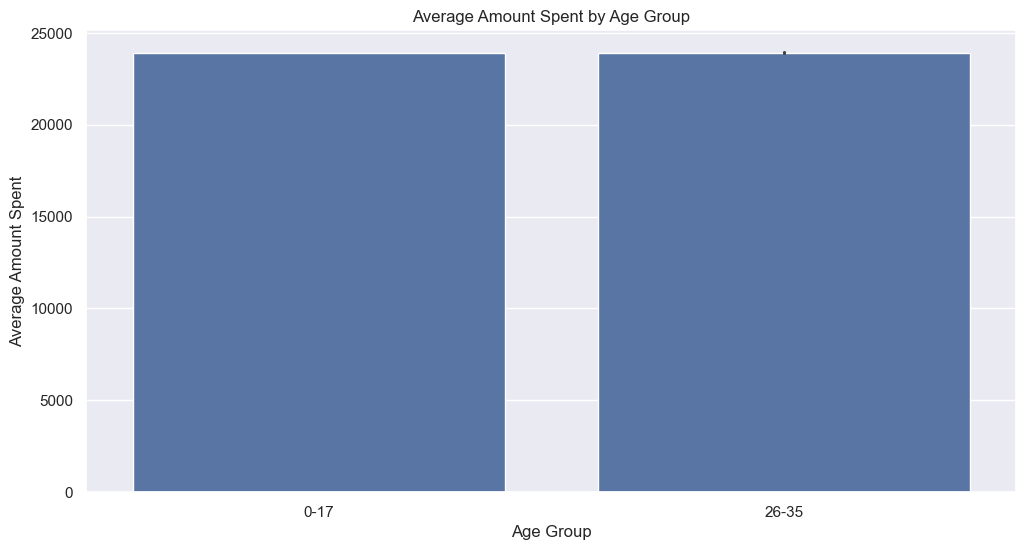

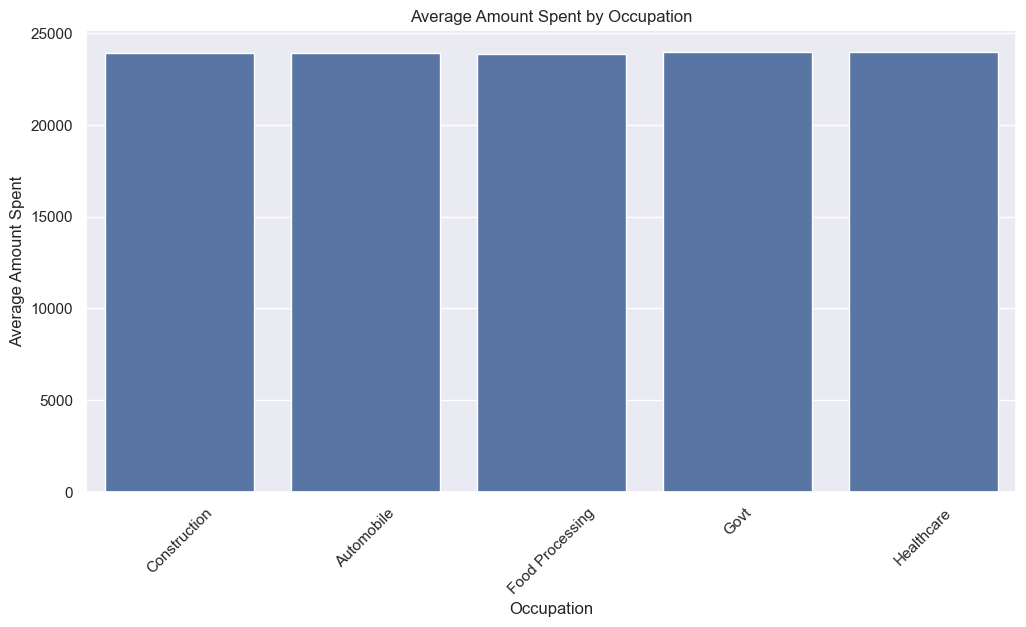

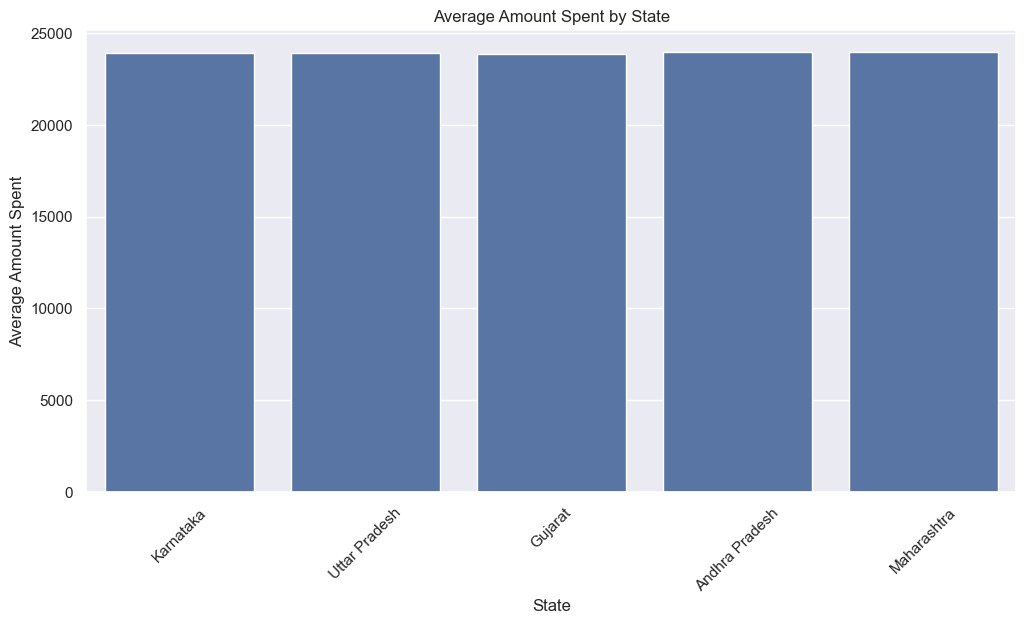

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Profile Age Groups
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Average Amount Spent', data=segments)
plt.title('Average Amount Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Amount Spent')
plt.show()

# Profile Occupations
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Average Amount Spent', data=segments)
plt.title('Average Amount Spent by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.show()

# Profile States
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Average Amount Spent', data=segments)
plt.title('Average Amount Spent by State')
plt.xlabel('State')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.show()


#### Product Recommendation System

In [234]:
import pandas as pd

# Sample data creation (replace with your actual DataFrame)
df = pd.DataFrame({
    'user_id': ['user1', 'user2', 'user3', 'user1', 'user2'],
    'product_id': ['prod1', 'prod2', 'prod3', 'prod2', 'prod3'],
    'rating': [5, 3, 4, 2, 5],
    'category': ['Electronics', 'Books', 'Clothing', 'Books', 'Clothing']
})

# Display the first few rows of the dataset
print(df.head())


  user_id product_id  rating     category
0   user1      prod1       5  Electronics
1   user2      prod2       3        Books
2   user3      prod3       4     Clothing
3   user1      prod2       2        Books
4   user2      prod3       5     Clothing


In [236]:
#Build the Recommendation System
#1. Create a User-Item Matrix

# Create a user-item matrix
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')
print(user_item_matrix)


product_id  prod1  prod2  prod3
user_id                        
user1         5.0    2.0    NaN
user2         NaN    3.0    5.0
user3         NaN    NaN    4.0


In [238]:
#2. Calculate Similarities Between Products

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fill NaN values with 0 for similarity calculation
user_item_matrix_filled = user_item_matrix.fillna(0)

# Calculate cosine similarity between products
product_similarity = cosine_similarity(user_item_matrix_filled.T)

# Create a DataFrame for product similarities
product_similarity_df = pd.DataFrame(product_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
print(product_similarity_df)


product_id   prod1     prod2     prod3
product_id                            
prod1       1.0000  0.554700  0.000000
prod2       0.5547  1.000000  0.649722
prod3       0.0000  0.649722  1.000000


#### Sales Trend Analysis

C:\Users\verma\AppData\Local\Temp\ipykernel_24188\2864639683.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='category', data=category_sales, palette='viridis')


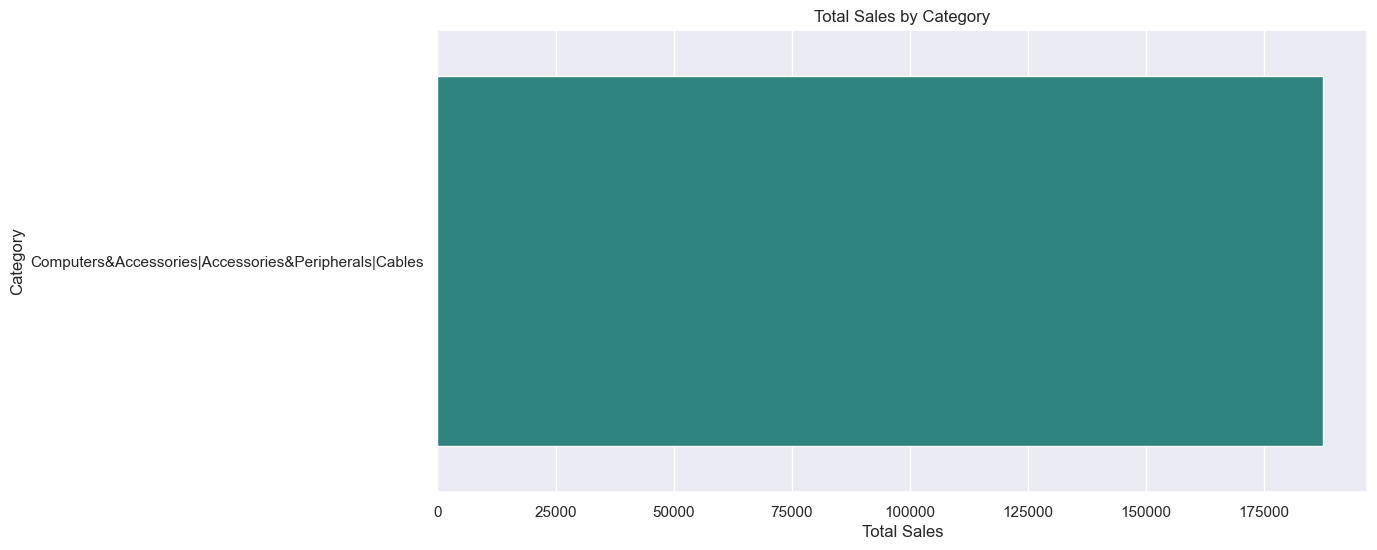

C:\Users\verma\AppData\Local\Temp\ipykernel_24188\2864639683.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='region', data=region_sales, palette='viridis')


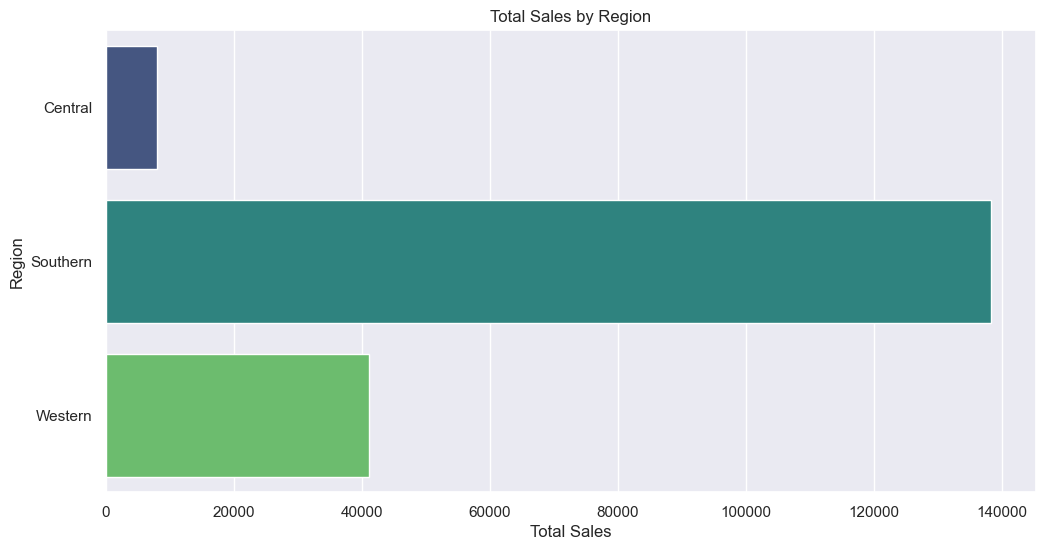

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data preparation
df = pd.DataFrame({
    'product_id': ['B07JW9H4J1', 'B098NS6PVG', 'B096MSW6CT', 'B08HDJ86NZ', 'B08CF3B7N1'],
    'category': ['Computers&Accessories|Accessories&Peripherals|Cables', 'Computers&Accessories|Accessories&Peripherals|Cables', 
                 'Computers&Accessories|Accessories&Peripherals|Cables', 'Computers&Accessories|Accessories&Peripherals|Cables', 
                 'Computers&Accessories|Accessories&Peripherals|Cables'],
    'discount_percentage': ['64%', '43%', '90%', '53%', '61%'],
    'rating': [4.2, 4.0, 3.9, 4.2, 4.2],
    'rating_count': [24269, 43994, 7928, 94363, 16905],
    'region': ['Western', 'Southern', 'Central', 'Southern', 'Western']
})

# Convert 'rating_count' to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Aggregate sales data by category and region
category_sales = df.groupby('category')['rating_count'].sum().reset_index()
region_sales = df.groupby('region')['rating_count'].sum().reset_index()

# Visualize sales trend by category
plt.figure(figsize=(12, 6))
sns.barplot(x='rating_count', y='category', data=category_sales, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

# Visualize sales trend by region
plt.figure(figsize=(12, 6))
sns.barplot(x='rating_count', y='region', data=region_sales, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()


#### Impact of Discounts on Sales

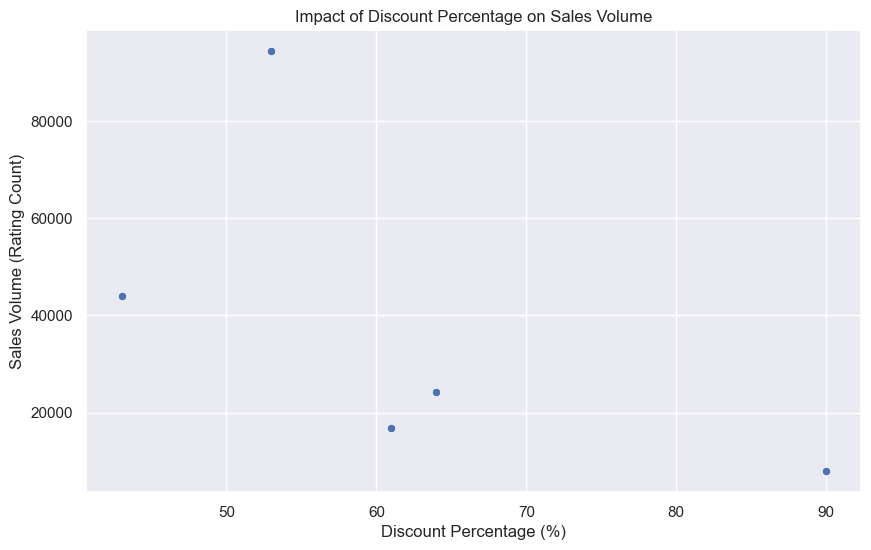

Correlation between Discount Percentage and Sales Volume: -0.61
                            OLS Regression Results                            
Dep. Variable:           rating_count   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     1.756
Date:                Wed, 21 Aug 2024   Prob (F-statistic):              0.277
Time:                        20:36:33   Log-Likelihood:                -57.622
No. Observations:                   5   AIC:                             119.2
Df Residuals:                       3   BIC:                             118.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

C:\Anaconda 3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data preparation
df = pd.DataFrame({
    'product_id': ['B07JW9H4J1', 'B098NS6PVG', 'B096MSW6CT', 'B08HDJ86NZ', 'B08CF3B7N1'],
    'category': ['Computers&Accessories|Accessories&Peripherals|Cables', 'Computers&Accessories|Accessories&Peripherals|Cables', 
                 'Computers&Accessories|Accessories&Peripherals|Cables', 'Computers&Accessories|Accessories&Peripherals|Cables', 
                 'Computers&Accessories|Accessories&Peripherals|Cables'],
    'discount_percentage': ['64%', '43%', '90%', '53%', '61%'],
    'rating': [4.2, 4.0, 3.9, 4.2, 4.2],
    'rating_count': [24269, 43994, 7928, 94363, 16905],
    'region': ['Western', 'Southern', 'Central', 'Southern', 'Western']
})

# Convert 'discount_percentage' and 'rating_count' to numeric
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Scatter plot for Discount vs Sales Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating_count', data=df)
plt.title('Impact of Discount Percentage on Sales Volume')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Sales Volume (Rating Count)')
plt.grid(True)
plt.show()

# Calculate the correlation between discount_percentage and rating_count
correlation = df['discount_percentage'].corr(df['rating_count'])
print(f"Correlation between Discount Percentage and Sales Volume: {correlation:.2f}")

# Optional: Perform a linear regression to model the relationship
import statsmodels.api as sm

# Define the independent variable (X) and dependent variable (y)
X = df[['discount_percentage']]
y = df['rating_count']

# Add a constant to the independent variable matrix (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())
